Source: https://www.acf.hhs.gov/sites/default/files/documents/cb/cm11.pdf

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Import & Clean Data

In [2]:
# "In NCANDS, a victim is defined as a child for whom the State determined at least one 
#  maltreatment was substantiated or indicated"

victims_df = pd.read_csv("Data/victims_2011.txt", sep='\t')
in_care_df = pd.read_csv("Data/in_care.txt", sep='\t')
adopted_df = pd.read_csv("Data/adopted.txt", sep='\t')
tpr_df = pd.read_csv("Data/tpr.txt", sep='\t')
perpetrators_df = pd.read_csv("Data/perpetrators.txt", sep='\t')

In [3]:
adopted_df.head()

,Status,State,FY 2010,FY 2011,FY 2012,FY 2013,FY 2014,FY 2015,FY 2016,FY 2017,FY 2018,FY 2019
0,Adopted,Alabama,606.0,447.0,587.0,532.0,544.0,512.0,503.0,504.0,712.0,738.0
1,Adopted,Alaska,336.0,293.0,309.0,328.0,367.0,357.0,312.0,366.0,353.0,396.0
2,Adopted,Arizona,2045.0,2275.0,2275.0,2522.0,3090.0,3236.0,3654.0,4298.0,3926.0,3373.0
3,Adopted,Arkansas,597.0,591.0,703.0,691.0,743.0,740.0,758.0,971.0,1001.0,984.0
4,Adopted,California,6459.0,5710.0,5938.0,5541.0,5471.0,6079.0,6542.0,6524.0,6966.0,6981.0


In [4]:
victims_df = victims_df.rename(columns = {"Number":"Victim Population", "Rate per 1,000":"Victim Rate per 1,000"})
perpetrators_df = perpetrators_df.rename(columns = {"Unique count Perpetrators":"Perpetrators"})

In [6]:
in_care = in_care_df.copy()
tpr = tpr_df.copy()
adopted = adopted_df.copy()

In [7]:
in_care["Difference"] = in_care["FY 2019"] - in_care["FY 2010"]
in_care.head()

,State,FY 2010,FY 2011,FY 2012,FY 2013,FY 2014,FY 2015,FY 2016,FY 2017,FY 2018,FY 2019,Difference
0,Alabama,5350.0,5253.0,4561.0,4435.0,4526.0,4745.0,5053.0,5631.0,5930.0,5783.0,433.0
1,Alaska,1791.0,1835.0,1854.0,1982.0,2190.0,2653.0,2824.0,2739.0,2781.0,2879.0,1088.0
2,Arizona,9930.0,10883.0,13461.0,14399.0,16246.0,17738.0,17118.0,15031.0,13360.0,13330.0,3400.0
3,Arkansas,3756.0,3732.0,3711.0,3797.0,3806.0,4548.0,4880.0,4776.0,4234.0,4127.0,371.0
4,California,56202.0,54754.0,54553.0,55383.0,56771.0,55983.0,54685.0,51869.0,52337.0,51268.0,-4934.0


In [8]:
status = []
for index, row in in_care.iterrows():
    difference = row["Difference"]
    if difference > 0:
        status.append("Increase")
    else:
        status.append("Decrease")
        
in_care["Status"] = status

In [9]:
in_care = in_care[["State","Status"]]

In [10]:
tpr = tpr.rename(columns = {"FY 2011":"2011 TPR"})
tpr = tpr[["State","2011 TPR"]]

In [11]:
adopted = adopted.rename(columns = {"FY 2011":"2011 Adopted"})
adopted = adopted[["State","2011 Adopted"]]

In [12]:
victims_df["State"] = victims_df["State"].astype(str)
victims_df["State"] = victims_df["State"].str.rstrip()
victims_df = victims_df[["State","Victim Population","Victim Rate per 1,000"]]

In [13]:
perpetrators_df["State"] = perpetrators_df["State"].astype(str)
perpetrators_df["State"] = perpetrators_df["State"].str.rstrip()

In [14]:
in_care_victims = victims_df.merge(in_care, how="inner", on = "State")
in_care_victims.head()

,State,Victim Population,"Victim Rate per 1,000",Status
0,Alabama,8601.0,7.63,Increasing
1,Alaska,2898.0,15.38,Increasing
2,Arizona,8708.0,5.36,Increasing
3,Arkansas,11105.0,15.63,Increasing
4,California,80100.0,8.64,Decreasing


In [15]:
in_care_victims_perps = perpetrators_df.merge(in_care_victims, how = "inner", on ="State")
in_care_victims_perps.head()

,State,Unique count Perpetrators,Victim Population,"Victim Rate per 1,000",Status
0,Alabama,7260.0,8601.0,7.63,Increasing
1,Alaska,2238.0,2898.0,15.38,Increasing
2,Arizona,9405.0,8708.0,5.36,Increasing
3,Arkansas,9552.0,11105.0,15.63,Increasing
4,California,62574.0,80100.0,8.64,Decreasing


In [16]:
in_care_victims_perps_tpr = tpr.merge(in_care_victims_perps, how = "inner", on ="State")
in_care_victims_perps_tpr.head()

,State,2011 TPR,Unique count Perpetrators,Victim Population,"Victim Rate per 1,000",Status
0,Alabama,701.0,7260.0,8601.0,7.63,Increasing
1,Alaska,389.0,2238.0,2898.0,15.38,Increasing
2,Arizona,2220.0,9405.0,8708.0,5.36,Increasing
3,Arkansas,742.0,9552.0,11105.0,15.63,Increasing
4,California,6928.0,62574.0,80100.0,8.64,Decreasing


In [17]:
in_care_victims_perps_tpr_adopted = adopted.merge(in_care_victims_perps_tpr, how = "inner", on ="State")
in_care_victims_perps_tpr_adopted.head()

,State,2011 Adopted,2011 TPR,Unique count Perpetrators,Victim Population,"Victim Rate per 1,000",Status
0,Alabama,447.0,701.0,7260.0,8601.0,7.63,Increasing
1,Alaska,293.0,389.0,2238.0,2898.0,15.38,Increasing
2,Arizona,2275.0,2220.0,9405.0,8708.0,5.36,Increasing
3,Arkansas,591.0,742.0,9552.0,11105.0,15.63,Increasing
4,California,5710.0,6928.0,62574.0,80100.0,8.64,Decreasing


In [18]:
final_df = in_care_victims_perps_tpr_adopted.drop("State",axis=1)
final_df = final_df.dropna(how='any')
final_df.head()

,2011 Adopted,2011 TPR,Unique count Perpetrators,Victim Population,"Victim Rate per 1,000",Status
0,447.0,701.0,7260.0,8601.0,7.63,Increasing
1,293.0,389.0,2238.0,2898.0,15.38,Increasing
2,2275.0,2220.0,9405.0,8708.0,5.36,Increasing
3,591.0,742.0,9552.0,11105.0,15.63,Increasing
4,5710.0,6928.0,62574.0,80100.0,8.64,Decreasing


In [19]:
target = final_df["Status"]
target_names = ["Increasing", "Decreasing"]
target.shape

(49,)

In [20]:
data = final_df.drop("Status", axis=1)
data.shape

(49, 5)

In [21]:
data.head()

,2011 Adopted,2011 TPR,Unique count Perpetrators,Victim Population,"Victim Rate per 1,000"
0,447.0,701.0,7260.0,8601.0,7.63
1,293.0,389.0,2238.0,2898.0,15.38
2,2275.0,2220.0,9405.0,8708.0,5.36
3,591.0,742.0,9552.0,11105.0,15.63
4,5710.0,6928.0,62574.0,80100.0,8.64


# Machine Learning

In [22]:
# Test, train, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler().fit(X_train)
X_test_scaled = StandardScaler().fit(X_test)

## SVM

In [35]:
from sklearn.svm import SVC 

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
# Model Accuracy
print('Test Acc: %.3f' % svm_model.score(X_test, y_test))

Test Acc: 0.615


In [37]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = svm_model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

  Increasing       0.75      0.43      0.55         7
  Decreasing       0.56      0.83      0.67         6

    accuracy                           0.62        13
   macro avg       0.65      0.63      0.61        13
weighted avg       0.66      0.62      0.60        13



## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

In [28]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Testing Data Score: 0.38461538461538464


## K Nearest Neighbor

In [30]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.385
k: 3, Train/Test Score: 0.806/0.462
k: 5, Train/Test Score: 0.750/0.538
k: 7, Train/Test Score: 0.750/0.462
k: 9, Train/Test Score: 0.750/0.462
k: 11, Train/Test Score: 0.750/0.462
k: 13, Train/Test Score: 0.750/0.462
k: 15, Train/Test Score: 0.750/0.462
k: 17, Train/Test Score: 0.750/0.462
k: 19, Train/Test Score: 0.750/0.462


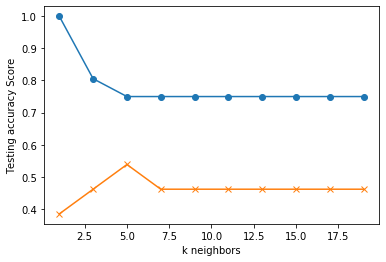

In [31]:
# Train KNN model and check model scores for desired k value
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [32]:
# Fit model with k=11
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
# Score model
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}")

Testing Data Score: 0.5384615384615384


# Prediction

In [41]:
prediction = svm_model.predict([[5930,209,1001,6000,5.6]])

print(f"Rate of children in care is predicted to: {prediction}")

Rate of children in care is predicted to: ['Decreasing']
